# Quality of Experience analysis using machine learning techniques
2022

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split , RandomizedSearchCV, KFold
from sklearn.ensemble import RandomForestClassifier
#from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix, recall_score, precision_score, accuracy_score

from sklearn.utils.multiclass import unique_labels
import seaborn as sn
import matplotlib.pyplot as plt

C:\Users\Insaf\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LARGE_SPARSE_SUPPORTED = LooseVersion(scipy_version) >= '0.14.0'
C:\Users\Insaf\anaconda3\envs\myenv\lib\site-packages\sklearn\ensemble\gradient_boosting.py:34: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from ._gradient_boosting import predict_stages
C:\Users\Insaf\anaconda3\envs\myenv\lib\site-packages\sklearn\ensemble\gradient_boosting.py:34: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not m

## Preparing the data

In [2]:
df_pk = pd.read_csv("pokemon.csv")

In [3]:
df_pk.head()

,id,user_id,QoA_VLCresolution,QoA_VLCbitrate,QoA_VLCframerate,QoA_VLCdropped,QoA_VLCaudiorate,QoA_VLCaudioloss,QoA_BUFFERINGcount,QoA_BUFFERINGtime,...,QoD_os-version,QoD_api-level,QoU_sex,QoU_age,QoU_Ustedy,QoF_begin,QoF_shift,QoF_audio,QoF_video,MOS
0,590,71,360,528.39294,24.950000,0,43.800000,0,2,683,...,4.1.1(122573.16),16,1,20,5,3,5,3,4,3
1,428,46,360,402.64664,30.066667,0,44.200000,0,2,690,...,4.4.2(I9195XXUCNK1),19,1,25,5,4,5,5,5,5
2,406,44,360,735.84070,24.200000,0,44.183333,0,2,840,...,4.1.2(I9300XXELL4),16,1,22,5,3,5,4,4,4
3,1256,133,240,529.48830,24.116667,9,43.850000,0,2,868,...,4.4.4(suv3Rw),19,1,31,5,4,5,5,5,5
4,244,22,360,736.00085,24.066667,0,43.850000,0,2,869,...,4.1.2(I9300XXELL4),16,0,26,5,5,5,4,5,5


There are two features that are not numerical, we need to convert them to numerical values. These are: QoD_os-version and QoD_model

In [4]:
print('The number of unique values of QoD_os-version is ',df_pk['QoD_os-version'].unique().shape , '\n their values are \n',df_pk['QoD_os-version'].unique())

The number of unique values of QoD_os-version is  (18,) 
 their values are 
 ['4.1.1(122573.16)' '4.4.2(I9195XXUCNK1)' '4.1.2(I9300XXELL4)'
 '4.4.4(suv3Rw)' '4.4.2(G900FXXU1ANG2)' '4.0.4(20130118.175432)'
 '4.4.2(G900FXXU1ANJ1)' '4.4.2(I9195XXUCNK4)' '5.0.1(457188.4)'
 '5.0.1(1602158)' '4.3(I9300XXUGNB5)' '5.0(G900FXXU1BOC7)'
 '4.3(I9506XXUBML5)' '5.1.1(456c49d1b2)' '5.0(G900FXXU1BOC2)'
 '4.4.2(N9005XXUGNI4)' '5.1.1(478106bf5f)' '4.4.2(G900FXXU1ANG9)']


In [5]:
unique_OS=df_pk['QoD_os-version'].unique()
for i in range(len(unique_OS)):
    df_pk = df_pk.replace({unique_OS[i]: i})


In [6]:
print('The number of unique values of QoD_os-version is ',df_pk['QoD_model'].unique().shape , '\n their values are \n',df_pk['QoD_model'].unique())

The number of unique values of QoD_os-version is  (15,) 
 their values are 
 ['HTC One X+' 'GT-I9195' 'GT-I9300' 'D5803' 'SM-G900F' 'ARCHOS 101G9'
 'HTC One_M8' 'Nexus 4' 'SM-N9005' 'GT-I9191' 'GT-I9192' 'D5802'
 'GT-I9189' 'GT-I9194' 'GT-I9193']


In [7]:
unique_OS=df_pk['QoD_model'].unique()
for i in range(len(unique_OS)):
    df_pk = df_pk.replace({unique_OS[i]: i})

In [8]:
df_pk.head()

,id,user_id,QoA_VLCresolution,QoA_VLCbitrate,QoA_VLCframerate,QoA_VLCdropped,QoA_VLCaudiorate,QoA_VLCaudioloss,QoA_BUFFERINGcount,QoA_BUFFERINGtime,...,QoD_os-version,QoD_api-level,QoU_sex,QoU_age,QoU_Ustedy,QoF_begin,QoF_shift,QoF_audio,QoF_video,MOS
0,590,71,360,528.39294,24.950000,0,43.800000,0,2,683,...,0,16,1,20,5,3,5,3,4,3
1,428,46,360,402.64664,30.066667,0,44.200000,0,2,690,...,1,19,1,25,5,4,5,5,5,5
2,406,44,360,735.84070,24.200000,0,44.183333,0,2,840,...,2,16,1,22,5,3,5,4,4,4
3,1256,133,240,529.48830,24.116667,9,43.850000,0,2,868,...,3,19,1,31,5,4,5,5,5,5
4,244,22,360,736.00085,24.066667,0,43.850000,0,2,869,...,2,16,0,26,5,5,5,4,5,5


Make the classes start from 0

In [9]:
df_pk['MOS']=df_pk['MOS']-1

In [10]:
df_pk.head()

,id,user_id,QoA_VLCresolution,QoA_VLCbitrate,QoA_VLCframerate,QoA_VLCdropped,QoA_VLCaudiorate,QoA_VLCaudioloss,QoA_BUFFERINGcount,QoA_BUFFERINGtime,...,QoD_os-version,QoD_api-level,QoU_sex,QoU_age,QoU_Ustedy,QoF_begin,QoF_shift,QoF_audio,QoF_video,MOS
0,590,71,360,528.39294,24.950000,0,43.800000,0,2,683,...,0,16,1,20,5,3,5,3,4,2
1,428,46,360,402.64664,30.066667,0,44.200000,0,2,690,...,1,19,1,25,5,4,5,5,5,4
2,406,44,360,735.84070,24.200000,0,44.183333,0,2,840,...,2,16,1,22,5,3,5,4,4,3
3,1256,133,240,529.48830,24.116667,9,43.850000,0,2,868,...,3,19,1,31,5,4,5,5,5,4
4,244,22,360,736.00085,24.066667,0,43.850000,0,2,869,...,2,16,0,26,5,5,5,4,5,4


In [11]:
X = df_pk.drop(labels='MOS', axis=1)
y = df_pk['MOS']

Note that the number of features is 22

## Dividing into training and test

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, 
                                        shuffle=True, random_state=4)

## Training using a random forest

In [13]:
model = RandomForestClassifier(n_estimators=100, 
                      criterion='gini', 
                      max_leaf_nodes=16, # Each tree cannot have more than that
                      random_state=5, # For reproducibility
                      n_jobs=-1, # Use all the CPUs
                      max_features = 'auto' # auto means=sqrt(n_features)
                      )

model.fit(X_train, y_train)

C:\Users\Insaf\anaconda3\envs\myenv\lib\site-packages\sklearn\ensemble\forest.py:487: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_store_unique_indices = np.zeros(y.shape, dtype=np.int)
C:\Users\Insaf\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\Insaf\anaconda3\envs\myenv\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=16,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=5, verbose=0, warm_start=False)

In [14]:
y_pred = model.predict(X_test)


C:\Users\Insaf\anaconda3\envs\myenv\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
C:\Users\Insaf\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


In [15]:
np.max(y_test) # number of classes

4

In [16]:
class_names = np.array(['Bad', 'Poor', 'Fair', "Good", 'Excellent'])

In [17]:
#plot_conf_mat(y_test, y_pred, class_names)
cm=confusion_matrix(y_test, y_pred)

In [18]:
# compute precision and recall
precision_test = precision_score(y_test, y_pred, average=None)
recall_test = recall_score(y_test, y_pred, average=None)


In [19]:
print('the precision for each class:\n', precision_test)
print('the recall for each class:\n', recall_test)

the precision for each class:
 [0.84375    0.68421053 0.5942029  0.77454545 0.97058824]
the recall for each class:
 [0.79411765 0.37142857 0.55405405 0.92608696 0.73333333]


In [20]:
# average precision and recall for all classes weighted by number of samples per class
precision_test_W = precision_score(y_test, y_pred, average='weighted')
recall_test_W = recall_score(y_test, y_pred, average='weighted')
print('the precision for all classes:\n', precision_test_W)
print('the recall for all classes:\n', recall_test_W)

the precision for all classes:
 0.7820826752391608
the recall for all classes:
 0.7775377969762419


In [21]:
f1_test = 2 * (precision_test_W * recall_test_W) / (precision_test_W + recall_test_W)
print('F1-score:', f1_test )

F1-score: 0.7798036140099562


In [22]:
df_cm = pd.DataFrame(cm, index = [i for i in "12345"],
                  columns = [i for i in "12345"])


In [23]:
df_cm

,1,2,3,4,5
1,27,3,2,2,0
2,5,13,10,7,0
3,0,3,41,29,1
4,0,0,16,213,1
5,0,0,0,24,66


<AxesSubplot:>

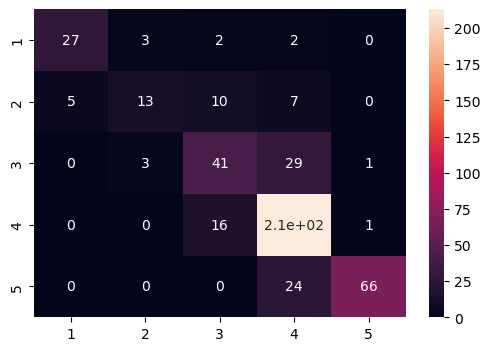

In [24]:
plt.figure(figsize = (6,4))
sn.heatmap(df_cm, annot=True)

In [25]:
cm_norm = np.zeros((5,5))
for i in range (cm.shape[0]):
    total=np.sum(cm[i,:])
    for j in range (cm.shape[1]):
        cm_norm[i,j]=cm[i,j]/total
print("normaliszed confusion matrix: \n", cm_norm)

normaliszed confusion matrix: 
 [[0.79411765 0.08823529 0.05882353 0.05882353 0.        ]
 [0.14285714 0.37142857 0.28571429 0.2        0.        ]
 [0.         0.04054054 0.55405405 0.39189189 0.01351351]
 [0.         0.         0.06956522 0.92608696 0.00434783]
 [0.         0.         0.         0.26666667 0.73333333]]


<AxesSubplot:>

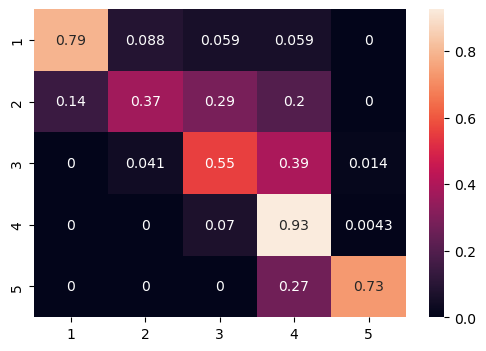

In [26]:
df_cm_norm = pd.DataFrame(cm_norm, index = [i for i in "12345"],
                  columns = [i for i in "12345"])
plt.figure(figsize = (6,4))
sn.heatmap(df_cm_norm, annot=True)

## check if there is overfitting by comparing with the training set

In [27]:
y_pred_train = model.predict(X_train)

C:\Users\Insaf\anaconda3\envs\myenv\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
C:\Users\Insaf\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


<AxesSubplot:>

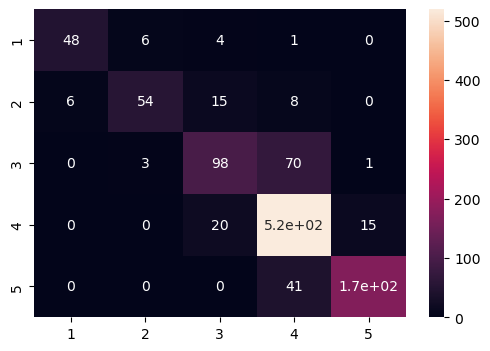

In [28]:
cm=confusion_matrix(y_train, y_pred_train)
df_cm = pd.DataFrame(cm, index = [i for i in "12345"],columns = [i for i in "12345"])
plt.figure(figsize = (6,4))
sn.heatmap(df_cm, annot=True)

<AxesSubplot:>

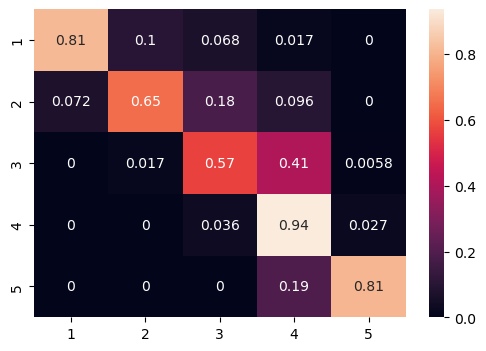

In [29]:
cm_norm = np.zeros((5,5))
for i in range (cm.shape[0]):
    total=np.sum(cm[i,:])
    for j in range (cm.shape[1]):
        cm_norm[i,j]=cm[i,j]/total
df_cm_norm = pd.DataFrame(cm_norm, index = [i for i in "12345"],
                  columns = [i for i in "12345"])
plt.figure(figsize = (6,4))
sn.heatmap(df_cm_norm, annot=True)

## check importance of features

In [30]:
importances=model.feature_importances_

C:\Users\Insaf\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


In [33]:
feature_names=list(df_pk.columns[:-1])

In [34]:
feature_names

['id',
 'user_id',
 'QoA_VLCresolution',
 'QoA_VLCbitrate',
 'QoA_VLCframerate',
 'QoA_VLCdropped',
 'QoA_VLCaudiorate',
 'QoA_VLCaudioloss',
 'QoA_BUFFERINGcount',
 'QoA_BUFFERINGtime',
 'QoS_type',
 'QoS_operator',
 'QoD_model',
 'QoD_os-version',
 'QoD_api-level',
 'QoU_sex',
 'QoU_age',
 'QoU_Ustedy',
 'QoF_begin',
 'QoF_shift',
 'QoF_audio',
 'QoF_video']

In [35]:
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)

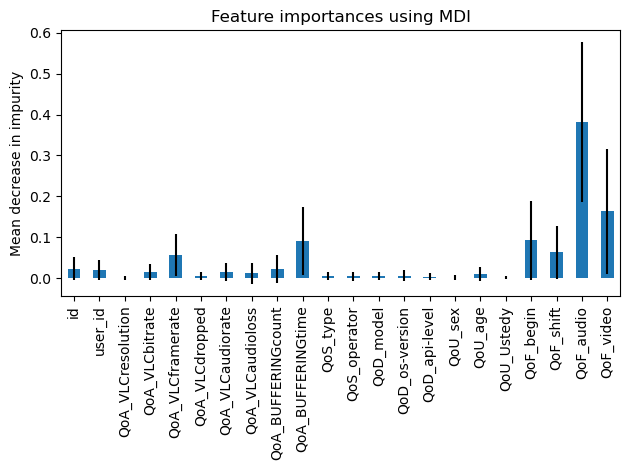

In [36]:
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

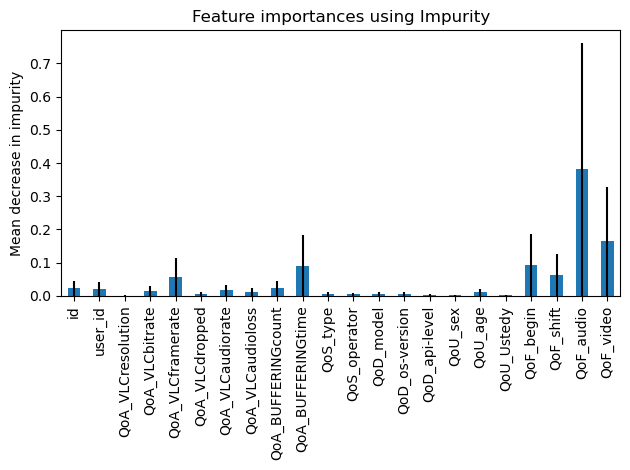

In [37]:
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=importances, ax=ax)
ax.set_title("Feature importances using Impurity")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

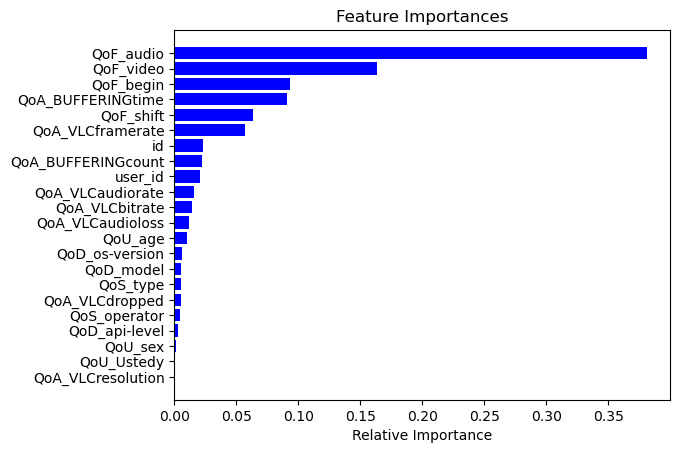

In [38]:
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Hyper parameter tuning

In [64]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 100000, num = 10)] # take 20 spaced variables in that interval
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
criterion= ['gini', 'entropy', 'log_loss'],
max_leaf_nodes=[16, 32, 64, 128, 256, 512, 1024, 2048],
min_impurity_decrease=[0, 0.001, 0.01, 0.1, 0.2],
min_weight_fraction_leaf=[0.1, 0.01, 0.001, 0]   

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               #'min_samples_split': min_samples_split,
               #'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               #'criterion':criterion,
               #'max_leaf_nodes':[16, 32, 64, 128, 256, 512, 1024, 2048],
               #'min_impurity_decrease':min_impurity_decrease,
               #'min_weight_fraction_leaf':min_weight_fraction_leaf
              }
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 5272, 10535, 15797, 21060, 26323, 31585, 36848, 42111, 47373, 52636, 57898, 63161, 68424, 73686, 78949, 84212, 89474, 94737, 100000, None], 'bootstrap': [True, False]}


In [65]:
# popular seed is 42
RF= RandomForestClassifier(random_state = 42)

In [66]:
search = RandomizedSearchCV(
                            scoring = 'accuracy', # See other possible metrics in
                                                # https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
                            
                            estimator=RF, 
                            param_distributions=random_grid,
                            n_iter=1000, # We just test 50 configurations
                            verbose=2,random_state=42, 
                            n_jobs=-1, # Train forests in parallel using 
                                      # all CPUs
                            cv=5 # 5-fold validation                      
                          )

In [67]:
# Note that we are training different random forests in parallel (n_jobs=-1),
# each with a certain combination of hyper-parameters.
search.fit(X_train, y_train)

C:\Users\Insaf\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_search.py:271: UserWarning: The total space of parameters 840 is smaller than n_iter=1000. Running 840 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
C:\Users\Insaf\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_search.py:274: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  random_state=rnd):
C:\Users\Insaf\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_split.py:665: Deprecati

Fitting 5 folds for each of 840 candidates, totalling 4200 fits


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   36.1s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 989 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 1434 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 1961 tasks      | elapsed:  8.9min
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed: 11.7min
[Parallel(n_jobs=-1)]: Done 3257 tasks      | elapsed: 15.2min
[Parallel(n_jobs=-1)]: Done 4026 tasks      | elapsed: 18.9min
[Parallel(n_jobs=-1)]: Done 4200 out of 4200 | elapsed: 19.9min finished
C:\Users\Insaf\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_search.py:821: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wi

C:\Users\Insaf\anaconda3\envs\myenv\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\Insaf\anaconda3\envs\myenv\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your c

C:\Users\Insaf\anaconda3\envs\myenv\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\Insaf\anaconda3\envs\myenv\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your c

C:\Users\Insaf\anaconda3\envs\myenv\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\Insaf\anaconda3\envs\myenv\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your c

C:\Users\Insaf\anaconda3\envs\myenv\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\Insaf\anaconda3\envs\myenv\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your c

C:\Users\Insaf\anaconda3\envs\myenv\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\Insaf\anaconda3\envs\myenv\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your c

C:\Users\Insaf\anaconda3\envs\myenv\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\Insaf\anaconda3\envs\myenv\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your c

C:\Users\Insaf\anaconda3\envs\myenv\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\Insaf\anaconda3\envs\myenv\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your c

C:\Users\Insaf\anaconda3\envs\myenv\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\Insaf\anaconda3\envs\myenv\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your c

C:\Users\Insaf\anaconda3\envs\myenv\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\Insaf\anaconda3\envs\myenv\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your c

C:\Users\Insaf\anaconda3\envs\myenv\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\Insaf\anaconda3\envs\myenv\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your c

C:\Users\Insaf\anaconda3\envs\myenv\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\Insaf\anaconda3\envs\myenv\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your c

C:\Users\Insaf\anaconda3\envs\myenv\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\Insaf\anaconda3\envs\myenv\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your c

C:\Users\Insaf\anaconda3\envs\myenv\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\Insaf\anaconda3\envs\myenv\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your c

C:\Users\Insaf\anaconda3\envs\myenv\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\Insaf\anaconda3\envs\myenv\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your c

C:\Users\Insaf\anaconda3\envs\myenv\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\Insaf\anaconda3\envs\myenv\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your c

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=1000, n_jobs=-1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 5272, 10535, 15797, 21060, 26323, 31585, 36848, 42111, 47373, 52636, 57898, 63161, 68424, 73686, 78949, 84212, 89474, 94737, 100000, None], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring='accuracy

In [68]:
#best_model = search.best_estimator_
print(search.best_params_)
best_model = search.best_estimator_

{'n_estimators': 2000, 'max_features': 'auto', 'max_depth': 5272, 'bootstrap': True}


In [69]:
y_pred = best_model.predict(X_test)

C:\Users\Insaf\anaconda3\envs\myenv\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
C:\Users\Insaf\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


In [70]:
print(search.best_params_)
best_model.fit(X_train, y_train)

{'n_estimators': 2000, 'max_features': 'auto', 'max_depth': 5272, 'bootstrap': True}


C:\Users\Insaf\anaconda3\envs\myenv\lib\site-packages\sklearn\ensemble\forest.py:487: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_store_unique_indices = np.zeros(y.shape, dtype=np.int)
C:\Users\Insaf\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\Insaf\anaconda3\envs\myenv\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the

C:\Users\Insaf\anaconda3\envs\myenv\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\Insaf\anaconda3\envs\myenv\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your c

C:\Users\Insaf\anaconda3\envs\myenv\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\Insaf\anaconda3\envs\myenv\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your c

C:\Users\Insaf\anaconda3\envs\myenv\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\Insaf\anaconda3\envs\myenv\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your c

C:\Users\Insaf\anaconda3\envs\myenv\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\Insaf\anaconda3\envs\myenv\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your c

C:\Users\Insaf\anaconda3\envs\myenv\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\Insaf\anaconda3\envs\myenv\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your c

C:\Users\Insaf\anaconda3\envs\myenv\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\Insaf\anaconda3\envs\myenv\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your c

C:\Users\Insaf\anaconda3\envs\myenv\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\Insaf\anaconda3\envs\myenv\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your c

C:\Users\Insaf\anaconda3\envs\myenv\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\Insaf\anaconda3\envs\myenv\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your c

C:\Users\Insaf\anaconda3\envs\myenv\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\Insaf\anaconda3\envs\myenv\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your c

C:\Users\Insaf\anaconda3\envs\myenv\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\Insaf\anaconda3\envs\myenv\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your c

C:\Users\Insaf\anaconda3\envs\myenv\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\Insaf\anaconda3\envs\myenv\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your c

C:\Users\Insaf\anaconda3\envs\myenv\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\Insaf\anaconda3\envs\myenv\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your c

C:\Users\Insaf\anaconda3\envs\myenv\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\Insaf\anaconda3\envs\myenv\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your c

C:\Users\Insaf\anaconda3\envs\myenv\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\Insaf\anaconda3\envs\myenv\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your c

C:\Users\Insaf\anaconda3\envs\myenv\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\Insaf\anaconda3\envs\myenv\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your c

C:\Users\Insaf\anaconda3\envs\myenv\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\Insaf\anaconda3\envs\myenv\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your c

C:\Users\Insaf\anaconda3\envs\myenv\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\Insaf\anaconda3\envs\myenv\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your c

C:\Users\Insaf\anaconda3\envs\myenv\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\Insaf\anaconda3\envs\myenv\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your c

C:\Users\Insaf\anaconda3\envs\myenv\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\Insaf\anaconda3\envs\myenv\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your c

C:\Users\Insaf\anaconda3\envs\myenv\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\Insaf\anaconda3\envs\myenv\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your c

C:\Users\Insaf\anaconda3\envs\myenv\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\Insaf\anaconda3\envs\myenv\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your c

C:\Users\Insaf\anaconda3\envs\myenv\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\Insaf\anaconda3\envs\myenv\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your c

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5272, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=2000, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [71]:
# compute precision and recall
precision_test = precision_score(y_test, y_pred, average=None)
recall_test = recall_score(y_test, y_pred, average=None)
print('the precision for each class:\n', precision_test)
print('the recall for each class:\n', recall_test)
# average precision and recall for all classes weighted by number of samples per class
precision_test_W = precision_score(y_test, y_pred, average='weighted')
recall_test_W = recall_score(y_test, y_pred, average='weighted')
print('the precision for all classes:\n', precision_test_W)
print('the recall for all classes:\n', recall_test_W)
print('the accuracy is \n',accuracy_score(y_test, y_pred) )

the precision for each class:
 [0.86206897 0.57692308 0.58024691 0.82608696 0.95945946]
the recall for each class:
 [0.73529412 0.42857143 0.63513514 0.90869565 0.78888889]
the precision for all classes:
 0.7965275928211307
the recall for all classes:
 0.7926565874730022
the accuracy is 
 0.7926565874730022


## More parameters checking the result

In [49]:
np.linspace(start = 200, stop = 2000, num = 10)

array([ 200.,  400.,  600.,  800., 1000., 1200., 1400., 1600., 1800.,
       2000.])

In [65]:
'''
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 100000, num = 10)] # take 20 spaced variables in that interval
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
criterion= ['gini', 'entropy', 'log_loss'],
max_leaf_nodes=[16, 32, 64, 128, 256, 512, 1024, 2048],
min_impurity_decrease=[0, 0.001, 0.01, 0.1, 0.2],
min_weight_fraction_leaf=[0.1, 0.01, 0.001, 0]   

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               #'bootstrap': bootstrap,
               #'criterion':criterion,
               'max_leaf_nodes':[16, 32, 64, 128, 256, 512, 1024, 2048],
               'min_impurity_decrease':min_impurity_decrease,
               'min_weight_fraction_leaf':min_weight_fraction_leaf
              }'''

random_grid = {
     'n_estimators':[ 200,  400,  600,  800, 1000, 1200],
    'criterion': ['gini', 'entropy'],
    'max_features':['auto', 'sqrt'],

    # Number of allowed leafs
    'max_leaf_nodes':[16, 32, 64, 128, 256, 512, 1024, 2048],

    # A node will be split if this split induces a decrease of the 
    # impurity greater than or equal to this value.
    'min_impurity_decrease' : [0, 0.001, 0.01, 0.1, 0.2],
            
    'max_depth':[1,10,100,1000,10000,100000],

    # A node can be a leaf only if it contains at least the following fraction
    # of samples
    'min_weight_fraction_leaf' : [0.1, 0.01, 0.001, 0],
     
     'min_samples_split' : [2, 5, 10]
    
}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200], 'criterion': ['gini', 'entropy'], 'max_features': ['auto', 'sqrt'], 'max_leaf_nodes': [16, 32, 64, 128, 256, 512, 1024, 2048], 'min_impurity_decrease': [0, 0.001, 0.01, 0.1, 0.2], 'max_depth': [1, 10, 100, 1000, 10000, 100000], 'min_weight_fraction_leaf': [0.1, 0.01, 0.001, 0], 'min_samples_split': [2, 5, 10]}


In [66]:
# popular seed is 42
RF= RandomForestClassifier(random_state = 42)

In [67]:
search = RandomizedSearchCV(
                            scoring = 'accuracy', # See other possible metrics in
                                                # https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
                            
                            estimator=RF, 
                            param_distributions=random_grid,
                            n_iter=1000, # We just test 50 configurations
                            verbose=2,random_state=42, 
                            n_jobs=-1, # Train forests in parallel using 
                                      # all CPUs
                            cv=5 # 5-fold validation                      
                          )

In [68]:
# Note that we are training different random forests in parallel (n_jobs=-1),
# each with a certain combination of hyper-parameters.
search.fit(X_train, y_train)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


C:\Users\Insaf\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_split.py:665: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_folds = np.zeros(n_samples, dtype=np.int)
C:\Users\Insaf\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_split.py:437: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision.

[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   23.5s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:   50.0s
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 989 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 1434 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 1961 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 3257 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 4026 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done 4877 tasks      | elapsed:  9.6min
[Parallel(n_jobs=-1)]: Done 5000 out of 5000 | elapsed:  9.8min finished
C:\Users\Insaf\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_search.py:821: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modif

C:\Users\Insaf\anaconda3\envs\myenv\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\Insaf\anaconda3\envs\myenv\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your c

C:\Users\Insaf\anaconda3\envs\myenv\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\Insaf\anaconda3\envs\myenv\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your c

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=1000, n_jobs=-1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200], 'criterion': ['gini', 'entropy'], 'max_features': ['auto', 'sqrt'], 'max_leaf_nodes': [16, 32, 64, 128, 256, 512, 1024, 2048], 'min_impurity_decrease': [0, 0.001, 0.01, 0.1, 0.2], 'max_depth': [1, 10, 100, 1000, 10000, 100000], 'min_weight_fraction_leaf': [0.1, 0.01, 0.001, 0], 'min_samples_split': [2, 5, 10]},
          pre_dispatch='2*n_jobs', random_state=42

In [69]:
#best_model = search.best_estimator_
print(search.best_params_)
best_model = search.best_estimator_

{'n_estimators': 200, 'min_weight_fraction_leaf': 0, 'min_samples_split': 2, 'min_impurity_decrease': 0, 'max_leaf_nodes': 64, 'max_features': 'sqrt', 'max_depth': 100000, 'criterion': 'entropy'}


In [70]:
y_pred = best_model.predict(X_test)

C:\Users\Insaf\anaconda3\envs\myenv\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
C:\Users\Insaf\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


In [71]:
print(search.best_params_)
best_model.fit(X_train, y_train)

{'n_estimators': 200, 'min_weight_fraction_leaf': 0, 'min_samples_split': 2, 'min_impurity_decrease': 0, 'max_leaf_nodes': 64, 'max_features': 'sqrt', 'max_depth': 100000, 'criterion': 'entropy'}


C:\Users\Insaf\anaconda3\envs\myenv\lib\site-packages\sklearn\ensemble\forest.py:487: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_store_unique_indices = np.zeros(y.shape, dtype=np.int)
C:\Users\Insaf\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\Insaf\anaconda3\envs\myenv\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the

C:\Users\Insaf\anaconda3\envs\myenv\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\Insaf\anaconda3\envs\myenv\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your c

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=100000, max_features='sqrt', max_leaf_nodes=64,
            min_impurity_decrease=0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [72]:
# compute precision and recall
precision_test = precision_score(y_test, y_pred, average=None)
recall_test = recall_score(y_test, y_pred, average=None)
print('the precision for each class:\n', precision_test)
print('the recall for each class:\n', recall_test)
# average precision and recall for all classes weighted by number of samples per class
precision_test_W = precision_score(y_test, y_pred, average='weighted')
recall_test_W = recall_score(y_test, y_pred, average='weighted')
print('the precision for all classes:\n', precision_test_W)
print('the recall for all classes:\n', recall_test_W)
print('the accuracy is \n',accuracy_score(y_test, y_pred) )

the precision for each class:
 [0.86206897 0.57692308 0.60759494 0.81322957 0.95833333]
the recall for each class:
 [0.73529412 0.42857143 0.64864865 0.90869565 0.76666667]
the precision for all classes:
 0.7942926120794165
the recall for all classes:
 0.7904967602591793
the accuracy is 
 0.7904967602591793


# Other codes

In [295]:
 param_grid = {
    'criterion':['gini', 'entropy'],
    'max_features':[1,2,3,4,5],

    # Number of allowed leafs
    'max_leaf_nodes':[16, 32, 64, 128, 256, 512, 1024, 2048],

    # A node will be split if this split induces a decrease of the 
    # impurity greater than or equal to this value.
    'min_impurity_decrease' : [0, 0.001, 0.01, 0.1, 0.2],
            
    'max_depth':[1,10,100,1000,10000,100000],

    # A node can be a leaf only if it contains at least the following fraction
    # of samples
    'min_weight_fraction_leaf' : [0.1, 0.01, 0.001, 0]
    
}

In [296]:
# Before we had used all the availble CPUs for training one random forest.
# Now, instead, we use one CPU per random forest (n_jobs=1). 
forest = RandomForestClassifier(n_estimators=100, random_state = 4, n_jobs=1,)

In [297]:
search = RandomizedSearchCV(
                            scoring = 'accuracy', # See other possible metrics in
                                                # https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
                            
                            estimator=forest, 
                            param_distributions=param_grid,
                            n_iter=50, # We just test 50 configurations
                            verbose=2,random_state=42, 
                            n_jobs=-1, # Train forests in parallel using 
                                      # all CPUs
                            cv=5 # 5-fold validation                      
                          )
# Note that we are training different random forests in parallel (n_jobs=-1),
# each with a certain combination of hyper-parameters.

search.fit(X_train, y_train)

C:\Users\Insaf\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_search.py:274: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  random_state=rnd):
C:\Users\Insaf\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_split.py:665: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    6.0s finished
C:\Users\Insaf\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_search.py:821: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
C:\Users\Insaf\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and wil

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=4, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=50, n_jobs=-1,
          param_distributions={'criterion': ['gini', 'entropy'], 'max_features': [1, 2, 3, 4, 5], 'max_leaf_nodes': [16, 32, 64, 128, 256, 512, 1024, 2048], 'min_impurity_decrease': [0, 0.001, 0.01, 0.1, 0.2], 'max_depth': [1, 10, 100, 1000, 10000, 100000], 'min_weight_fraction_leaf': [0.1, 0.01, 0.001, 0]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring='accuracy', verbose=2)

In [299]:
print(search.best_params_)

best_model = search.best_estimator_

{'min_weight_fraction_leaf': 0.001, 'min_impurity_decrease': 0.001, 'max_leaf_nodes': 32, 'max_features': 5, 'max_depth': 10000, 'criterion': 'entropy'}


In [300]:
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

plot_conf_mat(y_test, y_pred, class_names)

C:\Users\Insaf\anaconda3\envs\myenv\lib\site-packages\sklearn\ensemble\forest.py:487: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_store_unique_indices = np.zeros(y.shape, dtype=np.int)
C:\Users\Insaf\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\Insaf\anaconda3\envs\myenv\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the

NameError: name 'plot_conf_mat' is not defined

<AxesSubplot:>

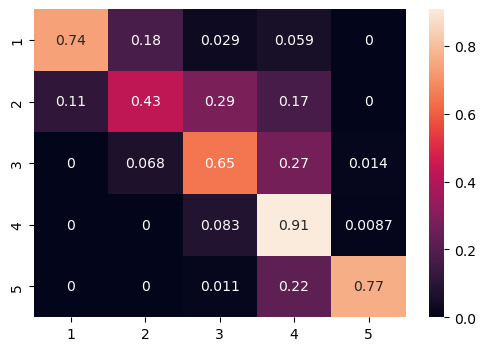

In [73]:
cm=confusion_matrix(y_test, y_pred)
cm_norm = np.zeros((5,5))
for i in range (cm.shape[0]):
    total=np.sum(cm[i,:])
    for j in range (cm.shape[1]):
        cm_norm[i,j]=cm[i,j]/total
df_cm_norm = pd.DataFrame(cm_norm, index = [i for i in "12345"],
                  columns = [i for i in "12345"])
plt.figure(figsize = (6,4))
sn.heatmap(df_cm_norm, annot=True)

In [305]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [314]:
best_model = search.best_estimator_

In [306]:
# compute precision and recall
precision_test = precision_score(y_test, y_pred, average=None)
recall_test = recall_score(y_test, y_pred, average=None)
print('the precision for each class:\n', precision_test)
print('the recall for each class:\n', recall_test)

the precision for each class:
 [0.87096774 0.68       0.5974026  0.78571429 0.984375  ]
the recall for each class:
 [0.79411765 0.48571429 0.62162162 0.90869565 0.7       ]


In [307]:
# average precision and recall for all classes weighted by number of samples per class
precision_test_W = precision_score(y_test, y_pred, average='weighted')
recall_test_W = recall_score(y_test, y_pred, average='weighted')
print('the precision for all classes:\n', precision_test_W)
print('the recall for all classes:\n', recall_test_W)

the precision for all classes:
 0.7925026590667049
the recall for all classes:
 0.7818574514038877


In [319]:
search = RandomizedSearchCV(
                            scoring = 'accuracy', # See other possible metrics in
                                                # https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
                            
                            estimator=forest, 
                            param_distributions=param_grid,
                            n_iter=100, # just test 100configurations
                            verbose=2,random_state=42, 
                            n_jobs=-1, # Train forests in parallel using 
                                      # all CPUs
                            cv=5 # 5-fold validation                      
                          )

In [ ]:
 param_grid = {
    'criterion':['gini', 'entropy', 'log_loss'],
    'max_features':['auto', 'sqrt'],

    # Number of allowed leafs
    'max_leaf_nodes':[16, 32, 64, 128, 256, 512, 1024, 2048],

    # A node will be split if this split induces a decrease of the 
    # impurity greater than or equal to this value.
    'min_impurity_decrease' : [0, 0.001, 0.01, 0.1, 0.2],
            
    'max_depth':[1,10,100,1000,10000,100000],

    # A node can be a leaf only if it contains at least the following fraction
    # of samples
    'min_weight_fraction_leaf' : [0.1, 0.01, 0.001, 0]
    
}
'criterion':['gini', 'entropy', 'log_loss'],
'max_leaf_nodes':[16, 32, 64, 128, 256, 512, 1024, 2048],
'min_impurity_decrease' : [0, 0.001, 0.01, 0.1, 0.2],
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 100000, num = 20)] # take 20 spaced variables in that interval
max_depth.append(None)
'min_weight_fraction_leaf' : [0.1, 0.01, 0.001, 0]   
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Method of selecting samples for training each tree
bootstrap = [True, False]

    # Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 100000, num = 20)] # take 20 spaced variables in that interval
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)
search = RandomizedSearchCV(
                            scoring = 'accuracy', # See other possible metrics in
                                                # https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
                            
                            estimator=forest, 
                            param_distributions=param_grid,
                            n_iter=50, # We just test 50 configurations
                            verbose=2,random_state=42, 
                            n_jobs=-1, # Train forests in parallel using 
                                      # all CPUs
                            cv=5 # 5-fold validation                      
                          )

In [309]:
 (np.linspace(4,8,num=3))

array([4., 6., 8.])

In [317]:
accuracy_score(y_test, y_pred)

0.7818574514038877